In [1]:
import numpy as np
import matplotlib.pyplot as plt
from hmm import discrete_observation_HMM as dHMM

import os, sys
parentPath = os.path.abspath("..")
if parentPath not in sys.path:
    sys.path.insert(0, parentPath)
import utils

In [2]:
S = 10 #number of states
O = 10 #number of possible observations
A = np.zeros((S,S))
B = np.zeros((S,S))
p0 = np.ones(S)/S
for i in range(S):
    for j in range(S):
        if i == j:
            A[i,j] = 0.9
        else:
            A[i,j] = 0.1/(S-1)
for i in range(S):
    for j in range(S):
        if i == j:
            B[i,j] = 0.8
        else:
            B[i,j] = 0.2/(S-1)

In [3]:
hmm = dHMM(A,B,p0,S,O)

In [4]:
states,observations = hmm.generate_data(100)

In [5]:
print states
print observations

[0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 9, 9, 9, 9, 9, 9, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 7, 4, 3, 7, 4, 4, 4, 1, 9, 9, 9, 9, 9, 9, 3, 9, 4, 4, 3, 4, 4, 4, 4, 6, 4, 4, 4, 4, 8, 8, 8, 8, 8, 4, 8, 8, 9, 9, 9, 0, 9, 1, 9, 8, 3, 1, 3, 3, 3, 3, 7, 3, 3, 3, 3, 3, 3, 3, 2, 3, 5, 3, 3, 1, 3, 3, 3, 3, 0, 3, 6, 1, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 8, 0, 0, 0, 0, 0]


In [6]:
t = range(100)

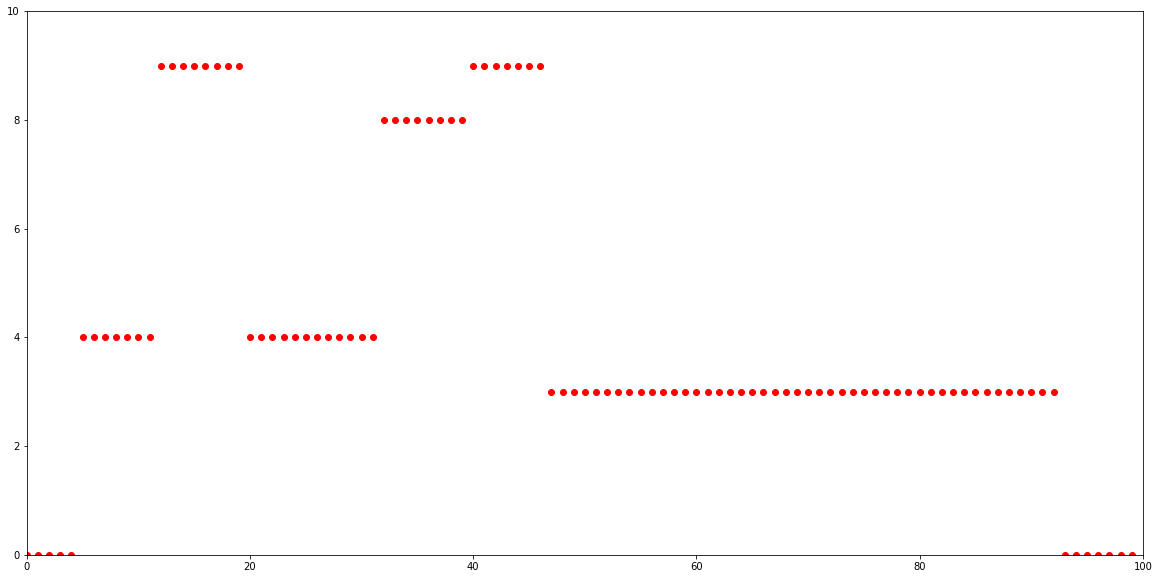

In [7]:
plt.figure(figsize=(20,10))
plt.plot(t, states, 'ro')
plt.axis([0,100,0,10])
plt.show()

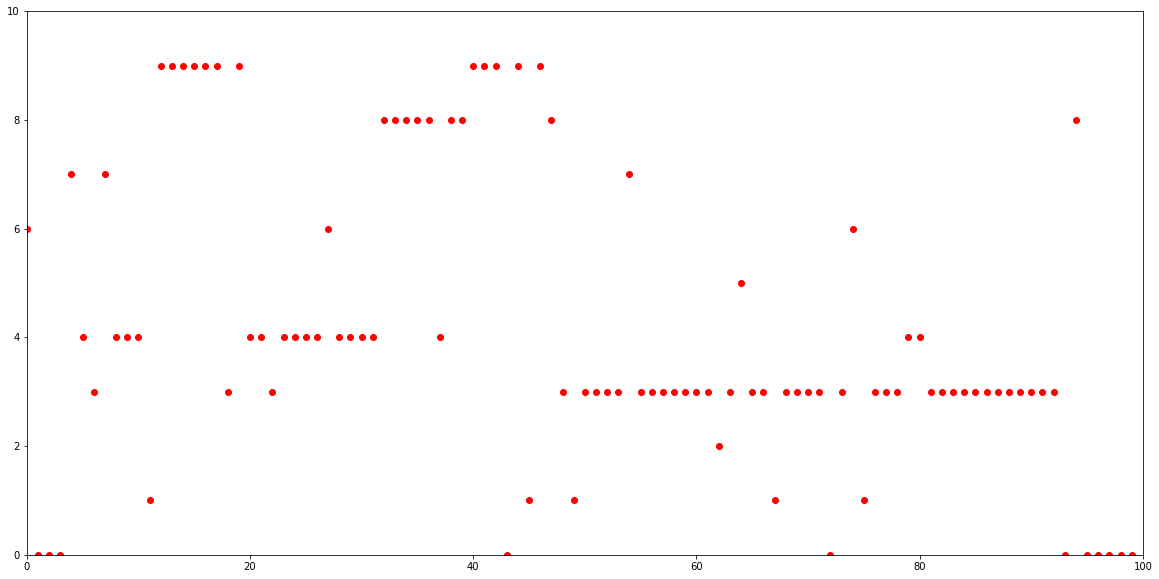

In [8]:
plt.figure(figsize=(20,10))
plt.plot(t, observations, 'ro')
plt.axis([0,100,0,10])
plt.show()

In [9]:
update, predict = hmm.forward_pass(observations)

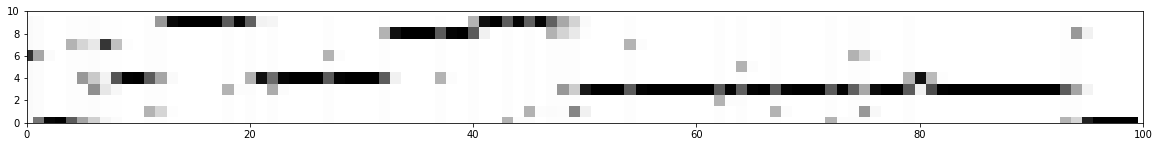

In [10]:
alfa = utils.normalize_exp(update)
plt.figure(figsize=(20,10))
plt.imshow(alfa, interpolation='nearest', cmap='gray_r')
plt.axis([0,100,10,0])
plt.gca().invert_yaxis()
plt.show()

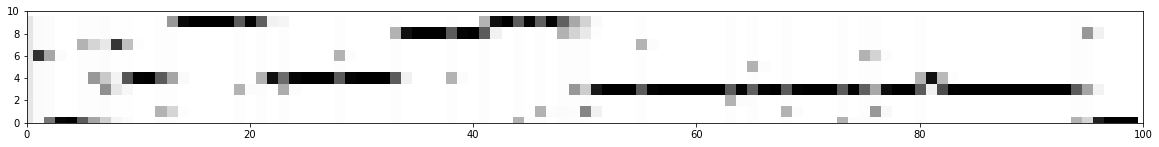

In [11]:
alfa = utils.normalize_exp(predict)
plt.figure(figsize=(20,10))
plt.imshow(alfa, interpolation='nearest', cmap='gray_r')
plt.axis([0,100,10,0])
plt.gca().invert_yaxis()
plt.show()

In [12]:
_, postdict = hmm.backward_pass(observations)

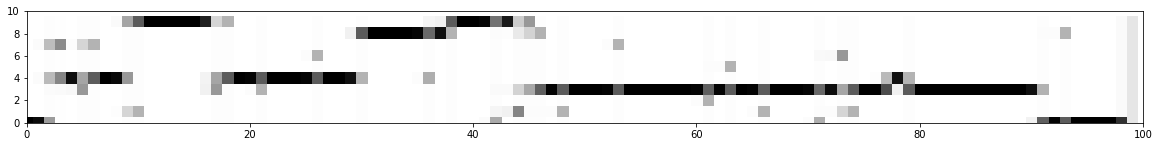

In [13]:
beta = utils.normalize_exp(postdict)
plt.figure(figsize=(20,10))
plt.imshow(beta, interpolation='nearest', cmap='gray_r')
plt.axis([0,100,10,0])
plt.gca().invert_yaxis()
plt.show()

In [14]:
log_gamma = hmm.forward_backward(observations)

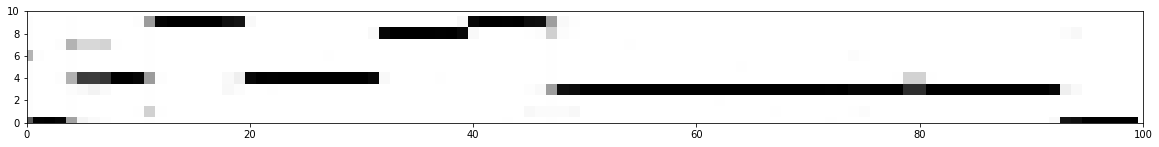

In [15]:
gamma = utils.normalize_exp(log_gamma)
plt.figure(figsize=(20,10))
plt.imshow(gamma, interpolation='nearest', cmap='gray_r')
plt.axis([0,100,10,0])
plt.gca().invert_yaxis()
plt.show()

In [16]:
max_path = hmm.viterbi(observations)

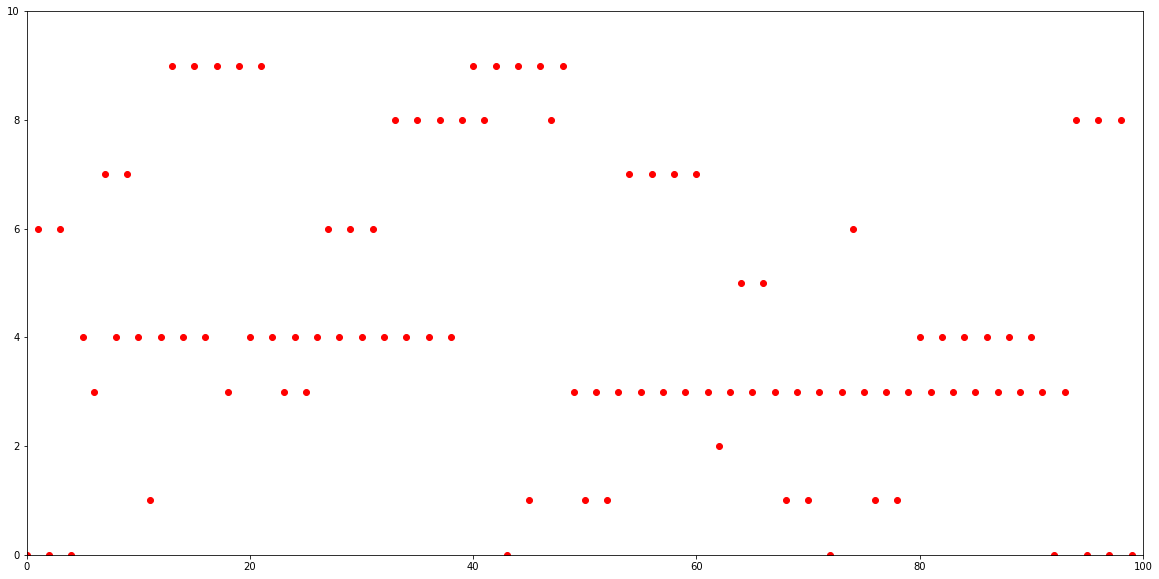

In [17]:
plt.figure(figsize=(20,10))
plt.plot(t, max_path, 'ro')
plt.axis([0,100,0,10])
plt.show()

In [18]:
_,y = hmm.generate_data(500)

In [19]:
A_estimated, B_estimated, pi_estimated = hmm.parameter_estimation_em(y,20)

In [20]:
print A_estimated

[[9.64723339e-01 4.41561028e-04 5.78954030e-05 7.39910306e-04
  1.93234699e-07 5.29536888e-04 1.93801381e-02 7.46567272e-20
  5.27794527e-06 4.37963830e-05]
 [2.94715658e-03 5.91035888e-01 5.04485962e-03 1.11992150e-01
  1.41565125e-01 5.94277405e-02 2.38171363e-02 9.11825102e-04
  4.08267104e-02 5.59407356e-09]
 [5.06710366e-03 4.82968147e-03 8.07491240e-01 1.73387290e-02
  8.13261685e-03 3.19627202e-04 4.05225620e-04 5.03039645e-03
  5.48750528e-02 4.08833095e-02]
 [3.63480428e-04 5.55618248e-02 7.68302624e-03 8.56259024e-01
  1.38829892e-04 3.97003526e-03 7.93891967e-04 9.34041411e-05
  2.67757251e-04 9.73460884e-13]
 [1.91645977e-06 1.71983419e-01 3.30650441e-02 4.79111879e-03
  8.26241353e-01 8.82076248e-03 9.70229526e-05 2.23096435e-03
  1.08196403e-03 9.49432225e-03]
 [4.03366338e-04 4.98082732e-02 7.27266730e-02 1.00457301e-03
  7.02579973e-04 9.05642975e-01 2.13637382e-05 9.08161052e-04
  1.41036531e-02 4.37212529e-05]
 [2.13706828e-02 1.01783910e-01 1.91272028e-03 4.36856996e

In [21]:
print B_estimated

[[6.93482904e-05 2.26924258e-02 5.32525809e-01 2.04436613e-02
  5.29125388e-03 7.78460795e-03 1.08306540e-02 2.69471922e-02
  9.26655183e-01 1.63640888e-02]
 [5.20877561e-44 2.16530548e-01 1.13634550e-02 1.35363543e-02
  8.61270808e-02 4.77598932e-02 1.12099090e-08 1.29568943e-25
  3.46278600e-02 3.29447249e-12]
 [7.07513121e-34 3.65471450e-02 4.64736565e-02 2.79888238e-06
  6.51828136e-01 2.73420941e-02 7.88492436e-12 2.34145578e-05
  5.87744865e-03 6.99713729e-10]
 [3.61351440e-02 1.29926130e-01 8.14154691e-02 8.66205356e-03
  3.70272690e-02 9.82488454e-03 5.04903456e-03 8.34524577e-01
  5.94695654e-03 1.06822477e-13]
 [2.20460503e-02 2.24441282e-01 5.95656735e-02 8.50389242e-01
  6.24186873e-02 2.37995977e-02 2.38120101e-01 2.56551138e-02
  3.87958424e-04 7.26806950e-08]
 [2.21639939e-02 4.57404205e-03 1.64700409e-05 5.83521848e-10
  5.42426061e-02 3.17952816e-02 5.28671318e-01 9.29029307e-16
  6.79914819e-14 1.54477984e-02]
 [8.96147906e-01 1.66599974e-01 1.05712075e-01 5.83046002e

In [22]:
print pi_estimated

[1.00000000e+000 1.81729469e-025 1.77662031e-041 2.77316026e-041
 1.51928541e-037 2.04158085e-054 2.87484818e-046 2.46913067e-301
 1.02817676e-036 3.33392130e-056]


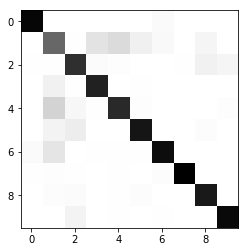

In [23]:
plt.imshow(A_estimated, cmap=plt.cm.binary)
plt.show()

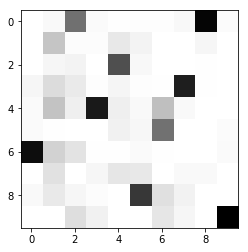

In [24]:
plt.imshow(B_estimated, cmap=plt.cm.binary)
plt.show()